# 웹캠, Colab, YOLO 연동

YOLO를 사용하기 위해 Keras로 변화하는 keras-yolo3를 사용한다.

https://github.com/qqwweee/keras-yolo3

## 프로젝트 다운로드


In [1]:
%cd /content

!rm -rf keras-yolo3

!git clone https://github.com/qqwweee/keras-yolo3


/content
Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 150.95 KiB | 1.16 MiB/s, done.
Resolving deltas: 100% (65/65), done.


## YOLO3 모델 다운로드


In [2]:
%cd /content/keras-yolo3
!wget wget https://pjreddie.com/media/files/yolov3.weights

/content/keras-yolo3
--2019-08-06 22:20:39--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2019-08-06 22:20:39--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  92.8MB/s    in 2.5s    

2019-08-06 22:20:42 (92.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

FINISHED --2019-08-06 22:20:42--
Total wall clock time: 3.1s
Downloaded: 1 files, 237M in 2.5s (92.8 MB/s)


## 모델 파일 변환

DarkNet의 모델파일을 Keras에서 사용할 수 있는 모델 파일로 변환한다.


- convert.py : 변환 실행 파일
- yolov3.cfg : Darknet에서 사용하는 모델 구조 정의 파일
- yolov3.weight : Darknet으로 학습된 모델 파일

실행 결과로 다음의 h5 파일로 변환된다. 
- yolov3.h5 : 변환된 모델 파일


In [3]:
# 실행하기전 기존것이 있다면 삭제
!rm -rf yolov3.h5

# 실행 
%run convert.py yolov3.cfg yolov3.weights yolov3.h5

Using TensorFlow backend.
W0806 22:21:09.460988 140013477463936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 22:21:09.512380 140013477463936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 22:21:09.524218 140013477463936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 22:21:09.553606 140013477463936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0806 

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)


W0806 22:21:09.967535 140013477463936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsing section convolutional_12
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_13
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_4
Parsing section convolution

W0806 22:22:36.896248 140013477463936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



Parsing section upsample_0
Parsing section route_1
Concatenating route layers: [<tf.Tensor 'up_sampling2d_1/ResizeNearestNeighbor:0' shape=(?, ?, ?, 256) dtype=float32>, <tf.Tensor 'add_19/add:0' shape=(?, ?, ?, 512) dtype=float32>]
Parsing section convolutional_60
conv2d bn leaky (1, 1, 768, 256)
Parsing section convolutional_61
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_62
conv2d bn leaky (1, 1, 512, 256)
Parsing section convolutional_63
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_64
conv2d bn leaky (1, 1, 512, 256)
Parsing section convolutional_65
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_66
conv2d    linear (1, 1, 512, 255)
Parsing section yolo_1
Parsing section route_2
Parsing section convolutional_67
conv2d bn leaky (1, 1, 256, 128)
Parsing section upsample_1
Parsing section route_3
Concatenating route layers: [<tf.Tensor 'up_sampling2d_2/ResizeNearestNeighbor:0' shape=(?, ?, ?, 128) dtype=float32>, <tf.Tensor 'add_11/ad

## 물체 탐지 실행

다음의 파일이 사용된다.
- yolov3.h5 : 모델 파일
- model_data/coco_classes.txt : 클래스 이름


--2019-08-06 22:23:25--  http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg
Resolving beltlineorg-wpengine.netdna-ssl.com (beltlineorg-wpengine.netdna-ssl.com)... 94.31.29.96
Connecting to beltlineorg-wpengine.netdna-ssl.com (beltlineorg-wpengine.netdna-ssl.com)|94.31.29.96|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89406 (87K) [image/jpeg]
Saving to: ‘street_view.jpg’

street_view.jpg     100%[===================>]  87.31K  --.-KB/s    in 0.09s   

2019-08-06 22:23:26 (1019 KB/s) - ‘street_view.jpg’ saved [89406/89406]



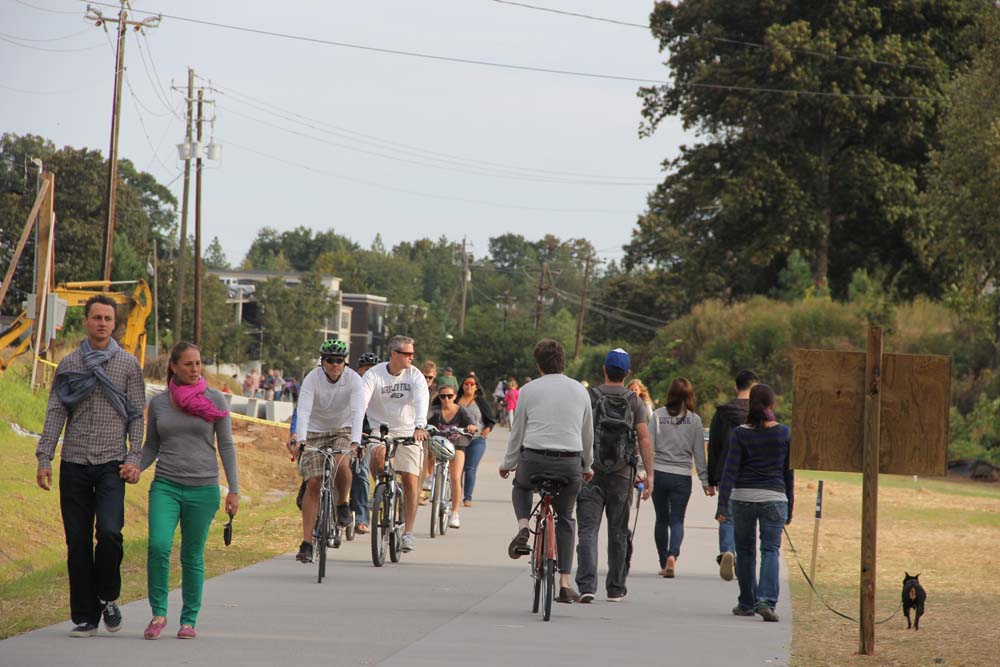

In [4]:
!wget -O street_view.jpg http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg

from IPython.display import Image, display
display(Image(filename='street_view.jpg')) 

In [7]:
from yolo import YOLO

yolo = YOLO(model_path='yolov3.h5', classes_path='model_data/coco_classes.txt')


yolov3.h5 model, anchors, and classes loaded.


(416, 416, 3)
Found 20 boxes for img
dog 0.91 (900, 571) (929, 631)
bicycle 0.54 (433, 439) (461, 527)
bicycle 0.69 (425, 451) (449, 537)
bicycle 0.85 (368, 438) (421, 567)
bicycle 0.95 (297, 438) (352, 574)
bicycle 0.99 (519, 478) (575, 617)
person 0.34 (495, 365) (545, 564)
person 0.54 (252, 368) (269, 403)
person 0.55 (270, 369) (286, 401)
person 0.71 (501, 376) (518, 423)
person 0.89 (455, 371) (489, 515)
person 0.96 (429, 377) (482, 510)
person 0.99 (290, 335) (370, 547)
person 0.99 (572, 353) (650, 599)
person 0.99 (358, 335) (437, 536)
person 1.00 (129, 341) (239, 645)
person 1.00 (719, 387) (793, 620)
person 1.00 (501, 338) (591, 600)
person 1.00 (645, 378) (708, 583)
person 1.00 (30, 298) (145, 638)
1.770188533999999


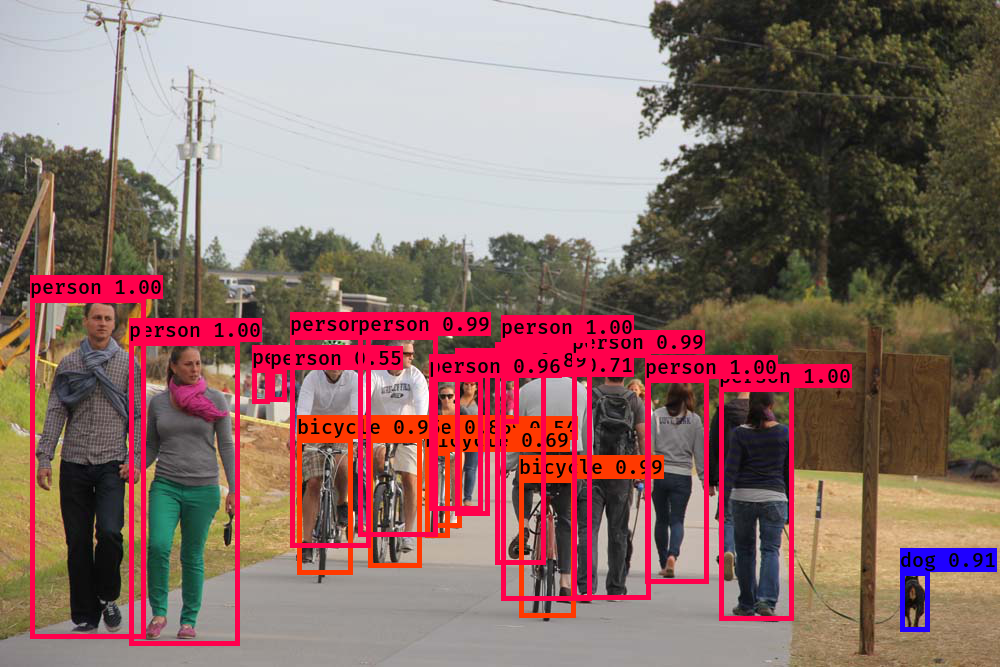

In [9]:
from IPython.display import display 
from PIL import Image
from yolo import YOLO

def get_detected_image(yolo, image):
  return yolo.detect_image(image)

image = Image.open('street_view.jpg')
detected_image = get_detected_image(yolo, image)
display(detected_image)


# 웹화면 구성

2개의 엘리멘트를 생성한다.

웹캠으로 받은 영상을 그대로 보여주는  'video'와 탐지된것을 보여주는'output'이름의  'img'
  
  

In [0]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

VIDEO_HTML = """
<video autoplay
 width=400 height=300></video>
<br>
<img id="output" src="https://ko.wikipedia.org/static/images/wikimedia-button.png"/>


<script>
var video = document.querySelector('video')
navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)

var canvas = document.createElement('canvas')
var [w,h] = [video.offsetWidth, video.offsetHeight]
canvas.width = w
canvas.height = h


</script>
"""

DATA_HTML = """
<script>
canvas.getContext('2d').drawImage(video, 0, 0, w, h)
var data = canvas.toDataURL('image/jpeg', %f)
</script>
"""

# 물체 추츨 실행

위에서 설정한 video에서 데이터를 읽고, YOLO를 호출하여 처리한 이미지를 표시한다.

In [47]:
from IPython.display import Image, display
from matplotlib import pyplot as plt
import cv2
import numpy as np
import base64

from PIL import Image

%matplotlib inline

def convert_jpeg_binary_to_cv2_image(binary_image):
  return cv2.imdecode(np.frombuffer(binary_image, dtype=np.uint8), -1)

def convert_jpeg_binary_to_pil_image(binary_image):
  cv2_image = convert_jpeg_binary_to_cv2_image(binary_image)
  return Image.fromarray(cv2_image)

def show_object_detected(quality=1.0):
  display(HTML(VIDEO_HTML))
  while True:
    display(HTML(DATA_HTML % quality))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    pil_image = convert_jpeg_binary_to_pil_image(binary)

    detected_image = get_detected_image(yolo, pil_image)

    binanry_img = cv2.imencode('.jpg', np.array(detected_image))[1]
    b64 = base64.b64encode(binanry_img).decode('ascii')
    display(HTML('''<script>document.getElementById("output").src="data:image/jpg;base64, {}"</script>'''.format(b64)))
    if data is None: break

  
show_object_detected()

(416, 416, 3)
Found 0 boxes for img
1.4355743779997283


(416, 416, 3)
Found 1 boxes for img
person 1.00 (23, 67) (374, 296)
1.6301865999998881


(416, 416, 3)
Found 1 boxes for img
person 1.00 (21, 67) (375, 296)
1.6134681569997156


(416, 416, 3)
Found 1 boxes for img
person 1.00 (21, 68) (375, 295)
1.6090362200002346


(416, 416, 3)
Found 1 boxes for img
person 1.00 (21, 66) (376, 297)
1.6237028260002262


(416, 416, 3)
Found 1 boxes for img
person 1.00 (22, 67) (374, 296)
1.6244784909999908


(416, 416, 3)
Found 1 boxes for img
person 1.00 (20, 65) (376, 298)
1.628320179000184


(416, 416, 3)
Found 1 boxes for img
person 1.00 (21, 66) (375, 298)
1.6205789489999916


(416, 416, 3)
Found 1 boxes for img
person 1.00 (19, 63) (379, 298)
1.635703117999583


(416, 416, 3)
Found 1 boxes for img
person 1.00 (86, 175) (304, 297)
1.6364851719999933


(416, 416, 3)
Found 1 boxes for img
person 0.98 (100, 171) (295, 300)
1.62023747000012


(416, 416, 3)
Found 1 boxes for img
person 0.98 (108, 170) (281, 298)
1.6122460530000353


(416, 416, 3)
Found 1 boxes for img
person 1.00 (110, 170) (282, 298)
1.6139927700000953


(416, 416, 3)
Found 1 boxes for img
person 1.00 (15, 54) (384, 294)
1.617988103999778


(416, 416, 3)
Found 1 boxes for img
person 1.00 (57, 81) (326, 298)
1.6172753129999364


(416, 416, 3)
Found 1 boxes for img
person 1.00 (53, 74) (332, 297)
1.6180185660000461


(416, 416, 3)
Found 1 boxes for img
person 1.00 (50, 74) (336, 300)
1.6414234919998307


(416, 416, 3)
Found 1 boxes for img
person 1.00 (43, 70) (370, 287)
1.6139102820002336


(416, 416, 3)
Found 1 boxes for img
person 1.00 (37, 57) (349, 299)
1.6174209599998903


(416, 416, 3)
Found 0 boxes for img
1.6383251530000962


(416, 416, 3)
Found 4 boxes for img
sofa 0.47 (23, 249) (175, 300)
sofa 0.68 (31, 211) (171, 278)
chair 0.31 (185, 212) (236, 247)
cup 0.48 (204, 272) (278, 299)
1.6375294589997793


(416, 416, 3)
Found 8 boxes for img
diningtable 0.32 (155, 162) (248, 240)
diningtable 0.37 (169, 214) (310, 289)
diningtable 0.73 (68, 228) (392, 295)
bed 0.62 (2, 136) (166, 216)
sofa 0.40 (2, 136) (166, 216)
chair 0.48 (186, 128) (232, 167)
chair 0.53 (239, 143) (306, 231)
cup 0.40 (208, 193) (275, 284)
1.6255722430000787


(416, 416, 3)


KeyboardInterrupt: ignored